In [1]:
import math
import torch
import matplotlib.pyplot as plt

In [2]:
# 학습용 데이터
x = torch.linspace(-math.pi, math.pi, 1000)
# 정답
y = torch.sin(x)

In [5]:
# 3차 다항식
# f(x) = ax**3 + bx**2 + cx + d
# 초기화
a,b,c,d = torch.randn(()),torch.randn(()),torch.randn(()),torch.randn(())
y_random = a*x**3 + b*x**2 + c*x + d

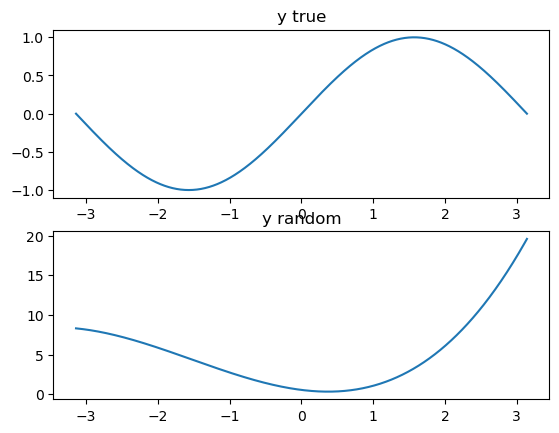

In [7]:
# 시각화
# 1.실제값 시각화
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x,y)
# 2 임의의 가중치로 만든 예측용 값으로 시각화
plt.subplot(2,1,2)
plt.title('y random')
plt.plot(x,y_random)

plt.show()

In [ ]:
# 파라메터 정의
learning_rate = 1e-6
for epoch in range(2000):
    # forward
    y_pred = a*x**3 + b*x**2 + c*x + d  # 모델
    # 손실 정의  MSE(평균제곱오차)  # 오차를 제곱 음수를 방지해서 크기만 보도록
    # 오차가 큰 값에 더 큰 패널티 부여
    loss = (y_pred - y).pow(2).sum().item()  # 텐서에 저장된 숫자값만 추출 (그래프 추적을 피함)
    if epoch % 100 == 0:
        print(f'epoch {epoch+1} : loss : {loss}')
    # 역전파 계산(BackPropagation) loss 줄이기 위해서  a,b,c,d 어느 방향으로 움직여야 할지 계산
    # 미분
    grad_y_pred = 2.0*(y_pred - y)  #기울기의 미분값
    grad_a = (grad_y_pred*x**3).sum()
    grad_b = (grad_y_pred*x**2).sum()
    grad_c = (grad_y_pred*x).sum()
    grad_d = (grad_y_pred).sum()
    # 가중치 업데이트
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

plt.subplot(3,1,1)
plt.plot(x,y)
plt.subplot(3,1,2)
plt.plot(x,y_random)
plt.subplot(3,1,3)
plt.plot(x, y_pred)